## T5 Online Data Science Bootcamps for SDAIA Academy

# COVID-19 cases and distribution.


#### On December 31st, 2019, the WHO Regional Office in China was informed of cases of pneumonia of unknown cause detected in Wuhan City, Hubei Province of China. On January 7th, 2020, the Chinese authorities announced they had identified a new virus that causes this case, 
#### And after that a disaster started.


----------------------------------------


In [2]:
# Necessary imports
import numpy as np
# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# Matplotlib and seaborn for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 

In [3]:
# Load data
df = pd.read_csv('owid-covid-data.csv')

In [4]:
# Take a look at the first few rows
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [5]:
# Take a look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132224 entries, 0 to 132223
Data columns (total 65 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   iso_code                                 132224 non-null  object 
 1   continent                                123776 non-null  object 
 2   location                                 132224 non-null  object 
 3   date                                     132224 non-null  object 
 4   total_cases                              124996 non-null  float64
 5   new_cases                                124994 non-null  float64
 6   new_cases_smoothed                       123951 non-null  float64
 7   total_deaths                             113895 non-null  float64
 8   new_deaths                               114091 non-null  float64
 9   new_deaths_smoothed                      123951 non-null  float64
 10  total_cases_per_million         

In [6]:
# How many rows and columns does the dataset have?
df.shape

(132224, 65)

In [7]:
#drop cols
df1 = df.drop(['new_cases_smoothed', 'new_deaths_smoothed', 'total_cases_per_million',
               'new_deaths_smoothed_per_million', 'icu_patients', 'icu_patients_per_million',
               'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions',
               'weekly_icu_admissions_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million',
               'total_deaths_per_million', 'new_deaths_per_million', 'weekly_hosp_admissions_per_million',
               'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed',
               'new_tests_smoothed_per_thousand', 'new_vaccinations_smoothed',
               'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
               'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
               'new_vaccinations_smoothed_per_million', 'gdp_per_capita', 'extreme_poverty',
               'hospital_beds_per_thousand', 'life_expectancy', 'excess_mortality_cumulative_absolute',
               'excess_mortality_cumulative', 'excess_mortality', 'excess_mortality_cumulative_per_million',
               'population_density', 'weekly_hosp_admissions', 'total_boosters', 'new_cases' , 'new_deaths',
               'new_tests', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated',
               'new_vaccinations', 'stringency_index', 'cardiovasc_death_rate', 'diabetes_prevalence',
               'human_development_index','aged_65_older', 'aged_70_older', 'median_age'], axis = 1)




In [8]:
df1.shape

(132224, 14)

In [10]:
# to viow the full description 
df1.describe()

,total_cases,total_deaths,reproduction_rate,total_tests,positive_rate,people_fully_vaccinated,population,female_smokers,male_smokers,handwashing_facilities
count,1.249960e+05,1.138950e+05,104426.000000,5.534500e+04,62869.000000,2.861400e+04,1.312860e+05,89045.000000,87757.000000,57523.000000
mean,2.028961e+06,5.025796e+04,0.998744,1.190922e+07,0.086493,3.961097e+07,1.575283e+08,10.590910,32.748122,50.867145
std,1.158691e+07,2.580142e+05,0.341348,4.957836e+07,0.095847,2.014267e+08,7.286525e+08,10.502976,13.511902,31.821770
min,1.000000e+00,1.000000e+00,-0.030000,0.000000e+00,0.000000,1.000000e+00,4.700000e+01,0.100000,7.700000,1.188000
25%,2.370000e+03,7.900000e+01,0.830000,2.560430e+05,0.016000,1.497340e+05,2.078723e+06,1.900000,21.600000,20.859000
50%,2.689150e+04,7.350000e+02,1.010000,1.288436e+06,0.051000,1.198080e+06,9.749625e+06,6.300000,31.400000,49.839000
75%,2.622140e+05,6.443500e+03,1.170000,5.281131e+06,0.124000,7.170276e+06,3.734479e+07,19.300000,41.300000,83.241000
max,2.508475e+08,5.064350e+06,6.010000,6.330199e+08,1.000000,3.148461e+09,7.874966e+09,44.000000,78.100000,100.000000


In [11]:
df1.sample(10)

,iso_code,continent,location,date,total_cases,total_deaths,reproduction_rate,total_tests,positive_rate,people_fully_vaccinated,population,female_smokers,male_smokers,handwashing_facilities
45744,GHA,Africa,Ghana,2021-07-21,99160.0,815.0,1.28,NaN,0.042,NaN,31732128.0,0.3,7.7,41.047
53420,HUN,Europe,Hungary,2021-07-13,808556.0,30010.0,1.03,5764022.0,0.006,5226741.0,9634162.0,26.8,34.8,NaN
111104,SSD,Africa,South Sudan,2021-03-03,8305.0,97.0,0.87,NaN,0.167,NaN,11381377.0,NaN,NaN,NaN
119571,TON,Oceania,Tonga,2021-04-20,NaN,NaN,NaN,NaN,NaN,NaN,106759.0,11.8,44.4,NaN
79858,MNG,Asia,Mongolia,2021-07-24,155224.0,767.0,1.00,NaN,NaN,NaN,3329282.0,5.5,46.5,71.180
82110,MMR,Asia,Myanmar,2020-05-23,201.0,6.0,0.76,17875.0,0.004,NaN,54806014.0,6.3,35.2,79.287
34961,EGY,Africa,Egypt,2021-03-07,186503.0,10995.0,1.00,NaN,NaN,NaN,104258327.0,0.2,50.1,89.827
46887,GRL,North America,Greenland,2021-05-06,NaN,NaN,NaN,NaN,NaN,NaN,56868.0,NaN,NaN,NaN
34648,EGY,Africa,Egypt,2020-04-28,5042.0,359.0,1.31,NaN,NaN,NaN,104258327.0,0.2,50.1,89.827
52871,HKG,Asia,Hong Kong,2021-09-19,12160.0,213.0,NaN,NaN,NaN,3975015.0,7552800.0,NaN,NaN,NaN


In [12]:
df1.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'total_deaths', 'reproduction_rate', 'total_tests', 'positive_rate', 'people_fully_vaccinated', 'population', 'female_smokers', 'male_smokers', 'handwashing_facilities'], dtype='object')

In [13]:
# Take a look at the datatypes after drop cols
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132224 entries, 0 to 132223
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   iso_code                 132224 non-null  object 
 1   continent                123776 non-null  object 
 2   location                 132224 non-null  object 
 3   date                     132224 non-null  object 
 4   total_cases              124996 non-null  float64
 5   total_deaths             113895 non-null  float64
 6   reproduction_rate        104426 non-null  float64
 7   total_tests              55345 non-null   float64
 8   positive_rate            62869 non-null   float64
 9   people_fully_vaccinated  28614 non-null   float64
 10  population               131286 non-null  float64
 11  female_smokers           89045 non-null   float64
 12  male_smokers             87757 non-null   float64
 13  handwashing_facilities   57523 non-null   float64
dtypes: f

---------------------------------

## Filling Null Values


In [9]:
df1.isna()

,iso_code,continent,location,date,total_cases,total_deaths,reproduction_rate,total_tests,positive_rate,people_fully_vaccinated,population,female_smokers,male_smokers,handwashing_facilities
0,False,False,False,False,False,True,True,True,True,True,False,True,True,False
1,False,False,False,False,False,True,True,True,True,True,False,True,True,False
2,False,False,False,False,False,True,True,True,True,True,False,True,True,False
3,False,False,False,False,False,True,True,True,True,True,False,True,True,False
4,False,False,False,False,False,True,True,True,True,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132219,False,False,False,False,False,False,False,False,False,False,False,False,False,False
132220,False,False,False,False,False,False,False,False,False,False,False,False,False,False
132221,False,False,False,False,False,False,False,False,False,False,False,False,False,False
132222,False,False,False,False,False,False,True,True,True,False,False,False,False,False


In [14]:
#######################
#######################
#######################
#######################
#######################
#######################
#######################
#######################



# Check for Null values
df1.isnull().sum()

iso_code                        0
continent                    8448
location                        0
date                            0
total_cases                  7228
total_deaths                18329
reproduction_rate           27798
total_tests                 76879
positive_rate               69355
people_fully_vaccinated    103610
population                    938
female_smokers              43179
male_smokers                44467
handwashing_facilities      74701
dtype: int64

In [15]:
df1.isnull().sum().sum()

474932

In [16]:
#######################
#######################
#######################
#######################
#######################
#######################
#######################
#######################


# Assign mean in null values

# total_cases
TC=df1.total_cases.mean()
df1.total_cases.fillna(TC,inplace=True)

# total_deaths
TD=df1.total_deaths.mean()
df1.total_deaths.fillna(TD,inplace=True)

# reproduction_rate 
RR=df1.reproduction_rate.mean()
df1.reproduction_rate.fillna(RR,inplace=True)

# total_tests
TT=df1.total_tests.mean()
df1.total_tests.fillna(TT,inplace=True)

# positive_rate
PR=df1.positive_rate.mean()
df1.positive_rate.fillna(PR,inplace=True)

# people_fully_vaccinated
PFV=df1.people_fully_vaccinated.mean()
df1.people_fully_vaccinated.fillna(PFV,inplace=True)

# population 
P=df1.population.mean()
df1.population.fillna(P,inplace=True)

# female_smokers
FS=df1.female_smokers.mean()
df1.female_smokers.fillna(FS,inplace=True)

# male_smokers
MS=df1.male_smokers.mean()
df1.male_smokers.fillna(MS,inplace=True)

# handwashing_facilities
HF=df1.handwashing_facilities.mean()
df1.handwashing_facilities.fillna(HF,inplace=True)

In [17]:
df1.dropna(how='all') 
df1

,iso_code,continent,location,date,total_cases,total_deaths,reproduction_rate,total_tests,positive_rate,people_fully_vaccinated,population,female_smokers,male_smokers,handwashing_facilities
0,AFG,Asia,Afghanistan,2020-02-24,5.0,50257.96258,0.998744,1.190922e+07,0.086493,3.961097e+07,39835428.0,10.59091,32.748122,37.746
1,AFG,Asia,Afghanistan,2020-02-25,5.0,50257.96258,0.998744,1.190922e+07,0.086493,3.961097e+07,39835428.0,10.59091,32.748122,37.746
2,AFG,Asia,Afghanistan,2020-02-26,5.0,50257.96258,0.998744,1.190922e+07,0.086493,3.961097e+07,39835428.0,10.59091,32.748122,37.746
3,AFG,Asia,Afghanistan,2020-02-27,5.0,50257.96258,0.998744,1.190922e+07,0.086493,3.961097e+07,39835428.0,10.59091,32.748122,37.746
4,AFG,Asia,Afghanistan,2020-02-28,5.0,50257.96258,0.998744,1.190922e+07,0.086493,3.961097e+07,39835428.0,10.59091,32.748122,37.746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132219,ZWE,Africa,Zimbabwe,2021-11-05,133112.0,4685.00000,0.730000,1.390021e+06,0.009000,2.633937e+06,15092171.0,1.60000,30.700000,36.791
132220,ZWE,Africa,Zimbabwe,2021-11-06,133168.0,4685.00000,0.750000,1.391906e+06,0.012000,2.642392e+06,15092171.0,1.60000,30.700000,36.791
132221,ZWE,Africa,Zimbabwe,2021-11-07,133187.0,4685.00000,0.750000,1.393065e+06,0.010000,2.648740e+06,15092171.0,1.60000,30.700000,36.791
132222,ZWE,Africa,Zimbabwe,2021-11-08,133205.0,4690.00000,0.998744,1.190922e+07,0.086493,2.654079e+06,15092171.0,1.60000,30.700000,36.791


In [18]:
#######################
#######################
#######################
#######################
#######################
#######################
#######################
#######################
#check the value "world" if it still exists
t=df1.location.value_counts()
t

Argentina                           679
Mexico                              679
Peru                                679
Thailand                            676
Taiwan                              664
South Korea                         659
Japan                               658
Upper middle income                 658
China                               658
Lower middle income                 658
North America                       658
High income                         658
World                               658
Asia                                658
United States                       658
Vietnam                             657
Europe                              657
Hong Kong                           657
European Union                      657
Singapore                           657
Malaysia                            656
France                              656
Nepal                               655
Oceania                             655
Canada                              654


In [19]:
# create datafreame 2 to visualiz the location 
df2 = df1

In [20]:
#######################
#######################
#######################
#######################
#######################
#######################
#######################
#######################


df2=df2.drop(df2.loc[df2['location']=='World'].index)

In [21]:
df2=df2.drop(df2.loc[df2['location']=='High income'].index)

In [22]:
df2=df2.drop(df2.loc[df2['location']=='Lower middle income'].index)

In [23]:
df2=df2.drop(df2.loc[df2['location']=='Asia'].index)

In [24]:
df2=df2.drop(df2.loc[df2['location']=='Upper middle income'].index)

In [25]:
df2=df2.drop(df2.loc[df2['location']=='South America'].index)

In [26]:
df2=df2.drop(df2.loc[df2['location']=='Low income'].index)

In [27]:
df2=df2.drop(df2.loc[df2['location']=='Africa'].index)

In [28]:
df2=df2.drop(df2.loc[df2['location']=='Europe'].index,)

In [29]:
df2=df2.drop(df2.loc[df2['location']=='North America'].index)

In [30]:
df2=df2.drop(df2.loc[df2['location']=='European Union'].index)

In [31]:
df1.shape

(132224, 14)

-------------------------------------

# Visualizations 


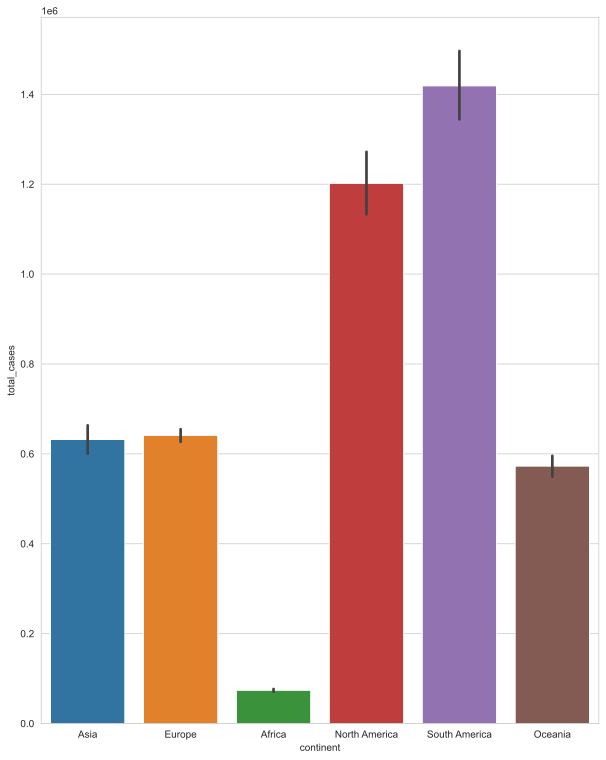

In [32]:
sns.set_style('whitegrid')
plt.figure(figsize=[10,13])
sns.barplot(x = 'continent',y='total_cases',data=df1);
plt.savefig('Barplot1.png')


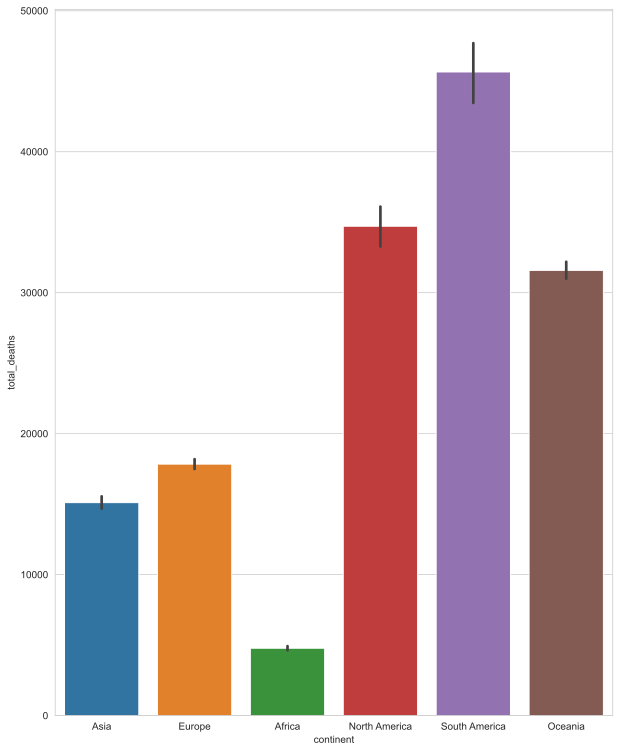

In [33]:
plt.figure(figsize=[10,13])
sns.barplot(x = 'continent',y='total_deaths',data=df1);

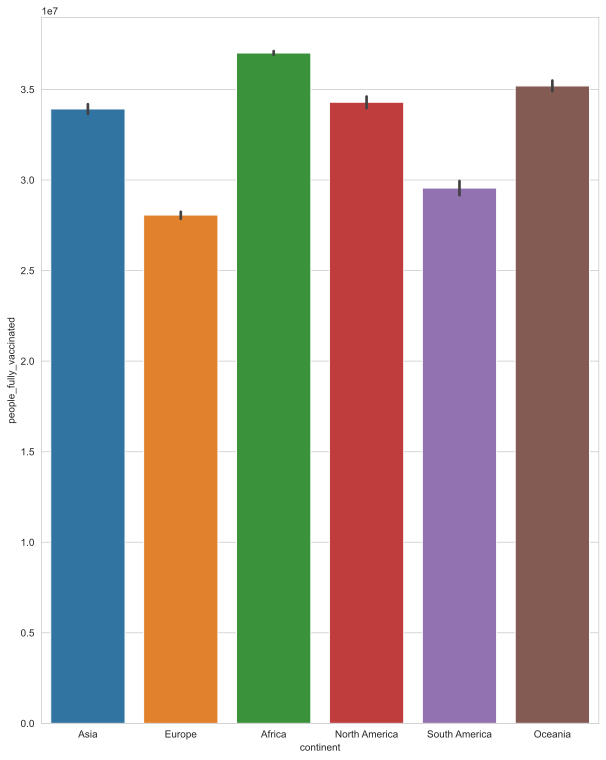

In [34]:
plt.figure(figsize=[10,13])
sns.barplot(x = 'continent',y='people_fully_vaccinated',data=df1);

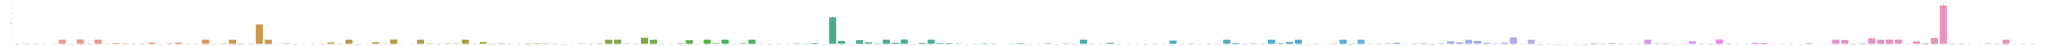

In [38]:
plt.figure(figsize=[600,13])
sns.barplot(x = 'location',y='total_cases',data=df2);
plt.savefig('Barplot22.png')

---------------------------------------

# Question and answer

In [91]:
# How many total cases in Saudi Arabia 
locc = 'Saudi Arabia'

sh = df1.loc[df1.location == locc]

Saudi_Arabia_total_cases= sh[['location' , 'total_cases']]

In [92]:
Saudi_Arabia_total_cases.max()

location       Saudi Arabia
total_cases        549022.0
dtype: object

In [97]:
# How many total cases in Egypt
loc = 'Egypt'

shh = df1.loc[df1.location == loc]

Egypt_total_cases= shh[['location' , 'total_cases']]

In [98]:
Egypt_total_cases.max()

location          Egypt
total_cases    339335.0
dtype: object

-------------------------

# View the correlations

<AxesSubplot:>

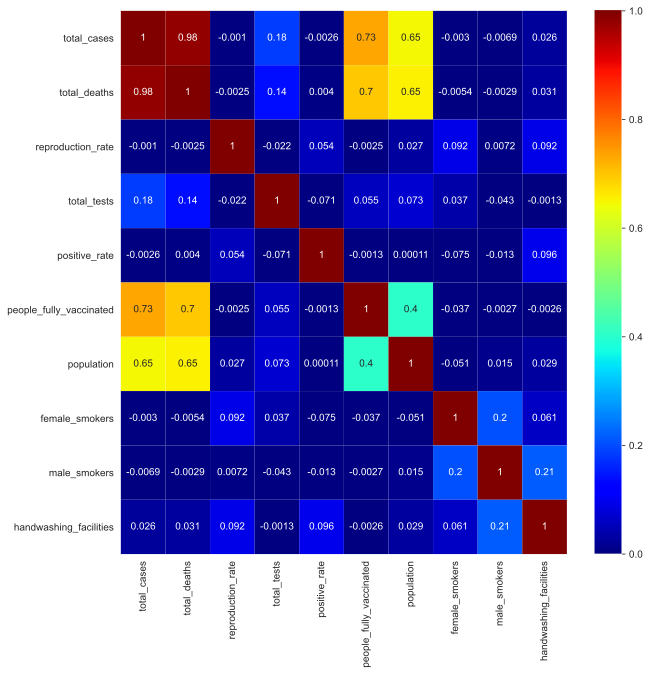

In [36]:
# View the correlations using heatmap
plt.figure(figsize=[10,10])
sns.heatmap(df1.corr(), cmap="jet", annot=True, vmin=0,vmax=1)

In [77]:
# View the correlations with total cases
df1.corr()['total_cases'].sort_values(ascending=False)

total_cases                1.000000
total_deaths               0.983481
people_fully_vaccinated    0.731926
population                 0.646081
total_tests                0.184132
handwashing_facilities     0.026122
reproduction_rate         -0.001019
positive_rate             -0.002628
female_smokers            -0.003031
male_smokers              -0.006909
Name: total_cases, dtype: float64

----------------------------

# Modeling and Evaluation 


In [78]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

In [80]:
# Define the model

lm1 = smf.ols('total_cases ~ total_deaths + people_fully_vaccinated + population + total_tests', data=df1)

# Fit the model
fit1 = lm1.fit()

# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_cases   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 1.262e+06
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:11:25   Log-Likelihood:            -2.0920e+06
No. Observations:              132224   AIC:                         4.184e+06
Df Residuals:                  132219   BIC:                         4.184e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -8.215e+05   5753.646   -142.779      0.000   -8.33e+05    -8.1e+05
total_deaths               42.2628      0.035   1197.975      0.000      42.194      42.332
people_fully_vaccinated     0.0116   7.41e-05    157.214      0.000       0.012       0.012
population                  0.0002   9.05e-06     26.805      0.000       0.000       0.000
total_tests                 0.0191      0.000    122.062      0.000       0.019       0.019
==============================================================================
Omnibus:                    68046.396   Durbin-Watson:                   0.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         22915084.918
Skew:                          -1.242   Prob(JB):                         0.00
Kurtosis:                      67.445   Cond. No.                     8.65e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.65e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
# Create an empty model
lr = LinearRegression()

# Choose the predictor variables, here all but the first which is the response variable
# This model is analogous to the Y ~ X1 + X2 + X3 + X4 + X5 + X6 model
X = df1[['total_deaths', 'people_fully_vaccinated', 'population', 'total_tests']]


# Choose the response variable(s)
y = df1['total_cases']

# Fit the model to the full dataset
lr.fit(X, y)

# Print out the R^2 for the model against the full dataset
lr.score(X,y)

0.9744829575247235

# Thank you